<a href="https://colab.research.google.com/github/Justinr2940/Summer-Micro-Credential/blob/main/Plant_iris_logistis_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Identify The Problem

This notebook will analyise the different classes of flowers based on the sepals and petals

#Import libraries

In [349]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
%matplotlib inline

#Load Data

In [350]:
df = pd.read_csv('https://raw.githubusercontent.com/Justinr2940/Machine-learning-Data/main/iris.csv')#Load in data
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [351]:
df.isnull()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [352]:
df.isnull().value_counts()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

In [353]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Visualizations

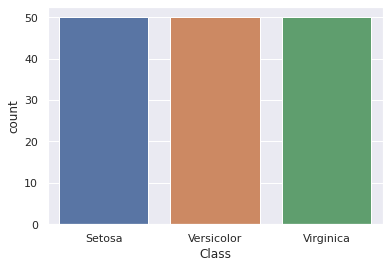

In [354]:
sns.countplot(data = df, x='Class')

Used a count plot to find out the number of items in each class

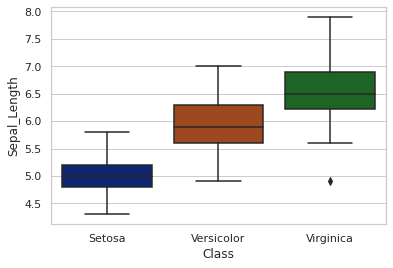

In [355]:
sns.set_style('whitegrid')
sns.boxplot(x = 'Class', y = 'Sepal_Length', data = df, palette = 'dark')


from operator import length_hint
Box plot chosen to seperate the plants in each class by their sepal length
It shows the different rangens of sepal length for each class
plants classifed in setosa have the smallest sepal length
plants in versicolor usually have a length between 5.5 and 6.5
and virginica plants are the class with the longest sepal length

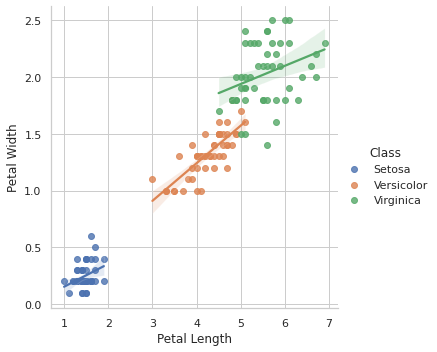

In [356]:
plant = sns.lmplot(data=df,x="Petal_Length", y="Petal_Width", hue="Class", height=5)
plant.set_axis_labels('Petal Length', 'Petal Width')


The lmplot allows me to see how each class is seperated based on the size of thier petals, with virginica having the largest petals, and setosa having the smallest

#There is no cost function needed

#There is no gradient decent function needed

#Train Test split

In [357]:
from sklearn.model_selection import train_test_split

In [358]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [359]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=100, random_state=0)#Splitting the data with a test size of 100

In [361]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
#Transforming the data

StandardScaler()

In [362]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic regression1

In [363]:
from sklearn.linear_model import LogisticRegression

In [364]:
classifier =LogisticRegression(random_state= 10)#Create logistic regression model


In [365]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

##Making predictions

In [366]:
y_pred = classifier.predict(X_test)

In [367]:
prediction = classifier.predict(X_test)

In [368]:
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test))
pp = classifier.predict(X_test)
setosa = 0
Virginica = 0
Versicolor = 0
for i in pp:
  if (i == 'Setosa'):
    setosa += 1
  elif i == 'Virginica' : 
    Virginica += 1
  else:
    Versicolor += 1

print('The number of plants classified as Setosa are: ', setosa)
print('The number of plants classified as  Virginca are: ', Virginica)
print('The number of plants classified as Versicolor are: ', Versicolor)
#Making predictions based on logistic regression model

the preditction accuracy of the model is  0.88
The number of plants classified as Setosa are:  30
The number of plants classified as  Virginca are:  25
The number of plants classified as Versicolor are:  45


##KNN Classifer

In [369]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)#Creating knn model

KNeighborsClassifier()

In [370]:
pred = knn.predict(X_test)

In [371]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [372]:
knn2 = accuracy_score(y_test, pred)#Checking knn model accuracy
knn2

0.94

In [373]:
print(confusion_matrix(y_test, pred))

[[31  0  0]
 [ 0 32  1]
 [ 0  5 31]]


In [374]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        31
  Versicolor       0.86      0.97      0.91        33
   Virginica       0.97      0.86      0.91        36

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [375]:
error_rate = []

for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
#Creating loop to detremin the reero rate of the knn model

In [376]:
error_rate

[0.08,
 0.12,
 0.06,
 0.09,
 0.06,
 0.14,
 0.14,
 0.15,
 0.13,
 0.14,
 0.13,
 0.17,
 0.15,
 0.15,
 0.15,
 0.18,
 0.16,
 0.17,
 0.18,
 0.19,
 0.19,
 0.2,
 0.2,
 0.24,
 0.23,
 0.23,
 0.21,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36]

Text(0, 0.5, 'Error Rate')

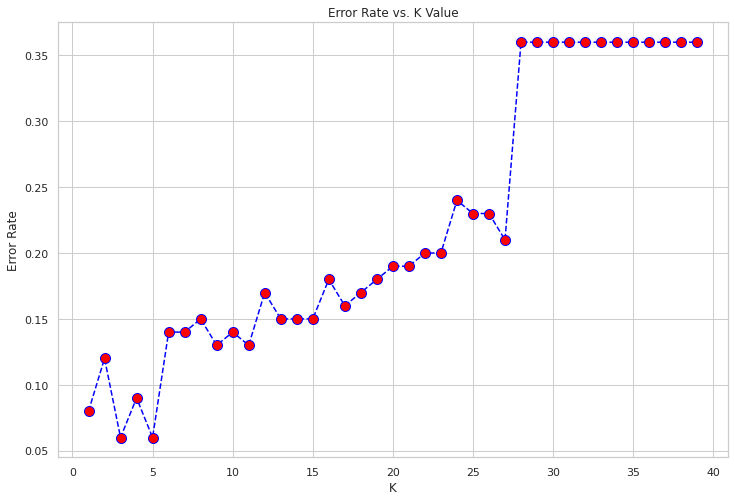

In [377]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Graphing the error rate

#Logistic regression 2

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=80, random_state=0)

In [379]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [380]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [381]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [382]:
y_pred = classifier.predict(X_test)

In [383]:
prediction = classifier.predict(X_test)

In [384]:
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test))
pp = classifier.predict(X_test)
setosa = 0
Virginica = 0
Versicolor = 0
for i in pp:
  if (i == 'Setosa'):
    setosa += 1
  elif i == 'Virginica' : 
    Virginica += 1
  else:
    Versicolor += 1

print('The number of plants classified as Setosa are: ', setosa)
print('The number of plants classified as  Virginca are: ', Virginica)
print('The number of plants classified as Versicolor are: ', Versicolor)


the preditction accuracy of the model is  0.925
The number of plants classified as Setosa are:  23
The number of plants classified as  Virginca are:  23
The number of plants classified as Versicolor are:  34


##KNN CLassifer

In [385]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)#Creating knn model

KNeighborsClassifier()

In [386]:
pred = knn.predict(X_test)

In [387]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [388]:
knn2 = accuracy_score(y_test, pred)#Checking knn model accuracy
knn2

0.95

In [389]:
print(confusion_matrix(y_test, pred))

[[23  0  0]
 [ 0 31  1]
 [ 0  3 22]]


In [390]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        23
  Versicolor       0.91      0.97      0.94        32
   Virginica       0.96      0.88      0.92        25

    accuracy                           0.95        80
   macro avg       0.96      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [391]:
error_rate = []

for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
#Creating loop to detremin the reero rate of the knn model

In [392]:
error_rate

[0.0625,
 0.1125,
 0.0625,
 0.075,
 0.05,
 0.075,
 0.075,
 0.1,
 0.1125,
 0.1375,
 0.1625,
 0.1625,
 0.175,
 0.2,
 0.1875,
 0.1875,
 0.225,
 0.2125,
 0.225,
 0.2125,
 0.1875,
 0.2,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.1875,
 0.2,
 0.2,
 0.2125,
 0.2125,
 0.2125,
 0.2125,
 0.2125,
 0.2125,
 0.225,
 0.2375,
 0.2375]

Text(0, 0.5, 'Error Rate')

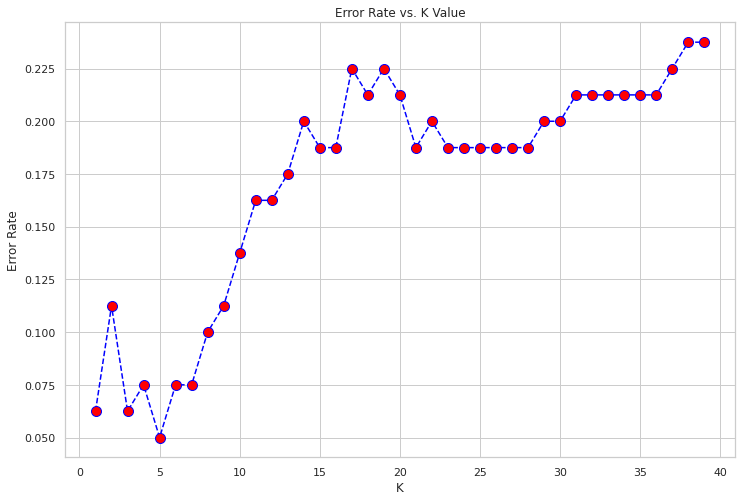

In [393]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Graphing the error rate

#Logistic Regression3

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=40, random_state=0)

In [395]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [396]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [397]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [398]:
y_pred = classifier.predict(X_test)

In [399]:
prediction = classifier.predict(X_test)

In [400]:
print("the preditction accuracy of the model is ", classifier.score(X_test, y_test))
pp = classifier.predict(X_test)
setosa = 0
Virginica = 0
Versicolor = 0
for i in pp:
  if (i == 'Setosa'):
    setosa += 1
  elif i == 'Virginica' : 
    Virginica += 1
  else:
    Versicolor += 1

print('The number of plants classified as Setosa are: ', setosa)
print('The number of plants classified as  Virginca are: ', Virginica)
print('The number of plants classified as Versicolor are: ', Versicolor)


the preditction accuracy of the model is  0.975
The number of plants classified as Setosa are:  13
The number of plants classified as  Virginca are:  10
The number of plants classified as Versicolor are:  17


##KNN Classifier

In [401]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)#Creating knn model

KNeighborsClassifier()

In [402]:
pred = knn.predict(X_test)

In [403]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [404]:
knn2 = accuracy_score(y_test, pred)#Checking knn model accuracy
knn2

0.975

In [405]:
print(confusion_matrix(y_test, pred))

[[13  0  0]
 [ 0 17  1]
 [ 0  0  9]]


In [406]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [407]:
error_rate = []

for i in range (1, 40):
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))
#Creating loop to detremin the reero rate of the knn model

In [408]:
error_rate

[0.075,
 0.05,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.05,
 0.025,
 0.075,
 0.05,
 0.075,
 0.075,
 0.075,
 0.1,
 0.1,
 0.1,
 0.1,
 0.075,
 0.1,
 0.075,
 0.1,
 0.1,
 0.1,
 0.075,
 0.1,
 0.125,
 0.1,
 0.125,
 0.1]

Text(0, 0.5, 'Error Rate')

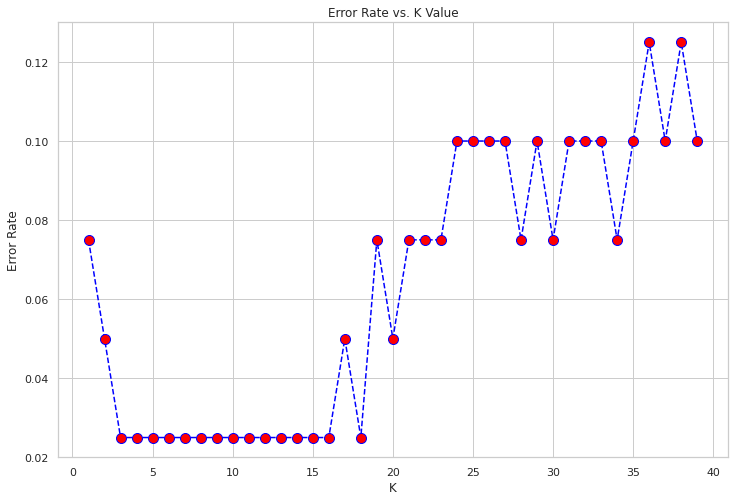

In [409]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle='dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')
#Graphing the error rate

#Conclusion

When Changing the split value we can see the difference in the accuracy of the knn model and the logistic regression. The main difference is the fact that the lower the test split value was the higher the accuracy of the model and the regression. I used three different splits in which the values where continously decreasing and the accuracy of the first model was 88 percent, while the accuracy of the 3rd model was 97 percent